In [1]:
import json
import matplotlib.pyplot as plt
from rolling_avg import rolling_avg
n_avg = 100

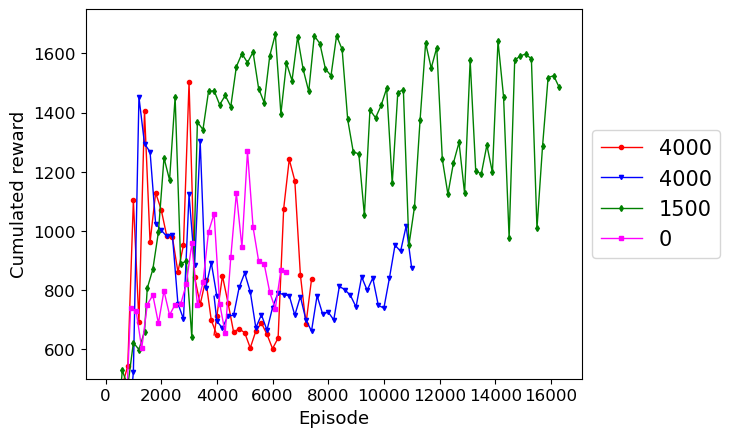

In [2]:

fig, ax = plt.subplots(1,1)
test_every = 200
markers = [None, 'o', 'v', 'd']
colors = ['','red', 'blue', 'green']
n_test_avg=20
# Step 2-3

for i in [2,4,6]:

    dir = f"outputs/ppo-adr-pretrained/step_{i}_train/"
    with open(dir + 'train_rewards.json') as f:
        training_rewards = json.load(f)
    averaged_rewards = rolling_avg(training_rewards, n_avg)
    with open(dir + 'test_rewards.json') as f:
        rewards = json.load(f)
    test_eps = range(test_every, len(averaged_rewards)*n_avg + test_every, test_every)
    if len(test_eps) > len(rewards):
        test_eps = test_eps[:-1]

    ax.plot(test_eps, rewards, linewidth=1, marker=markers[i//2], c=colors[i//2], markersize=3, label=str(len(training_rewards)))

    last_ep = range(0, len(averaged_rewards)*n_avg, n_avg)[-1]
    last_value = rewards[-1]

    dir = f"outputs/ppo-adr-pretrained/step_{i+1}_train/"
    with open(dir + 'rd_rewards.json') as f:
        rd_rewards = json.load(f)
    averaged_rewards = rolling_avg(rd_rewards, n_avg)
    with open(dir + 'ref_rewards.json') as f:
        ref_rewards = json.load(f)
    
    averaged_ref_rewards = rolling_avg(ref_rewards, n_test_avg)
    ax.plot(range(last_ep + 100, len(averaged_ref_rewards)*10*n_test_avg + last_ep + 100, 10*n_test_avg), averaged_ref_rewards, linewidth=1, marker=markers[i//2], c=colors[i//2], markersize=3)
    ax.plot([last_ep, last_ep+100], [last_value, averaged_ref_rewards[0]], linewidth=1, c=colors[i//2])


dir = f"outputs/ppo-adr/step_1_train/"
with open(dir + 'rd_rewards.json') as f:
    rd_rewards = json.load(f)
averaged_rewards = rolling_avg(rd_rewards, n_avg)
with open(dir + 'ref_rewards.json') as f:
    ref_rewards = json.load(f)
averaged_ref_rewards = rolling_avg(ref_rewards, n_test_avg)
ax.plot(range(0 + 100, len(averaged_ref_rewards)*10*n_test_avg + 0 + 100, 10*n_test_avg), averaged_ref_rewards, linewidth=1, marker='s', c='magenta', markersize=3, label='0')



ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel("Cumulated reward", fontsize=13)
ax.set_ylim(500, 1750)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=15)